# Package Entry Testing

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import coronaryx as cx
import coronaryx.functions as cxf
import coronaryx.algorithms as cxa  # TODO as cx and import to the global init everything from algorithms?

DATA_DIR = Path().absolute().parent / "data"

### Reading and plotting

In [2]:
dataset = cx.read_dataset(DATA_DIR)

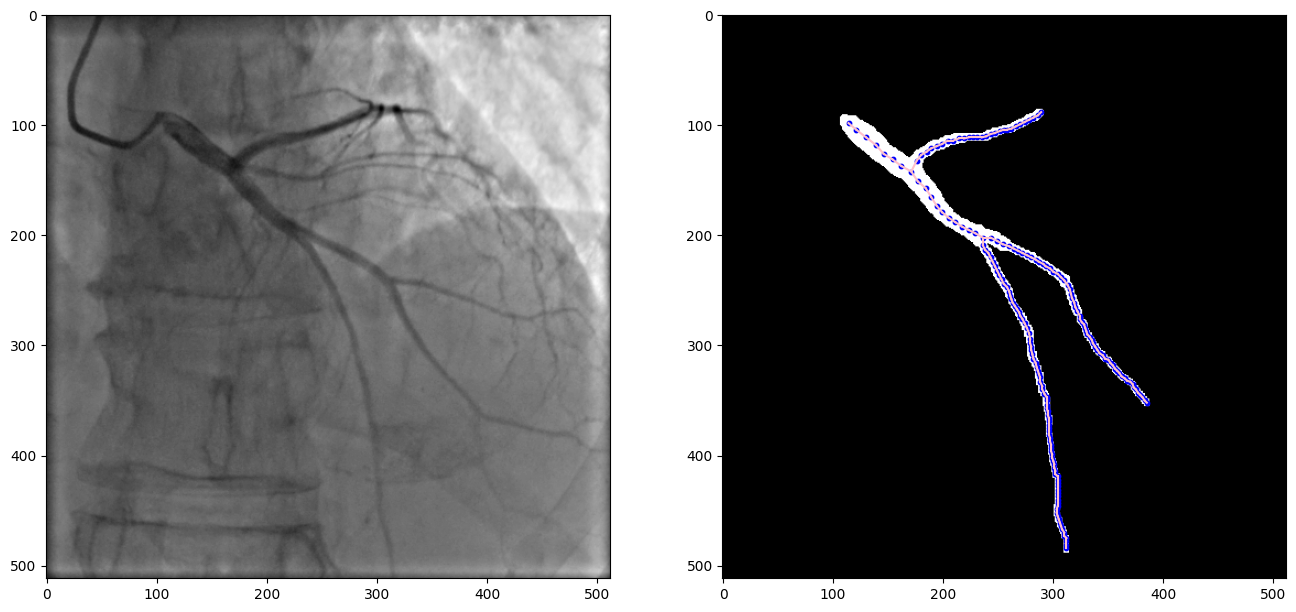

In [13]:
scan14 = dataset[14]
cx.plot_scan(scan14)

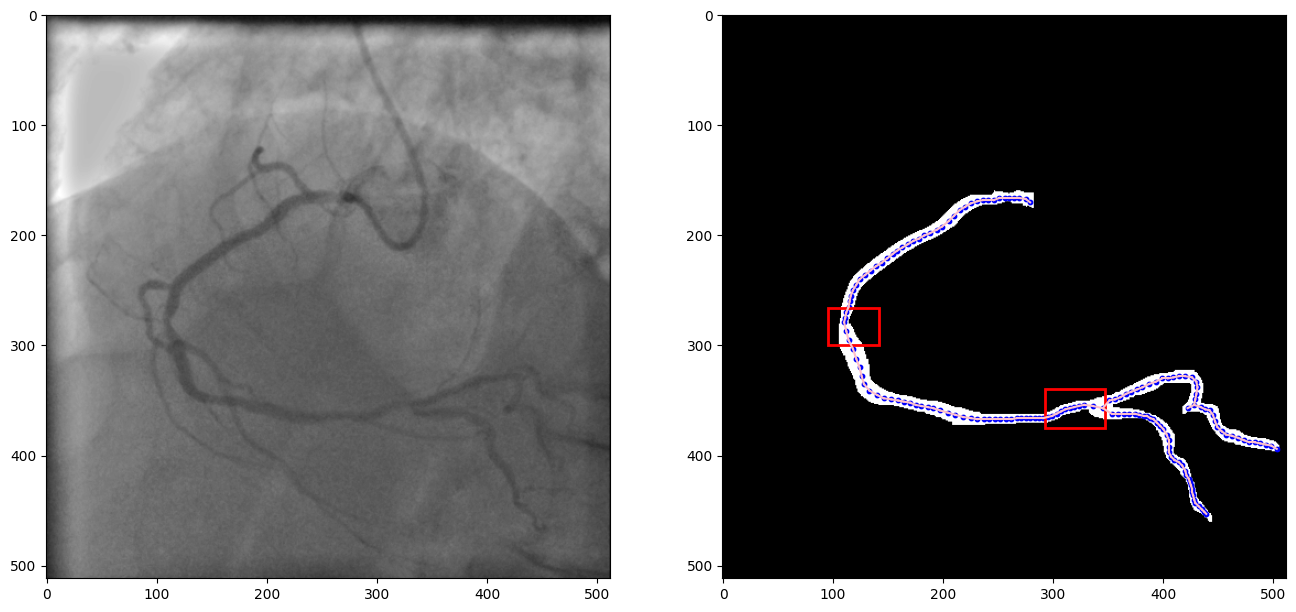

In [11]:
scan28 = dataset[28]
cx.plot_scan(scan28)

In [14]:
branches14 = cxa.split_into_branches(scan14)
branches28 = cxa.split_into_branches(scan28)

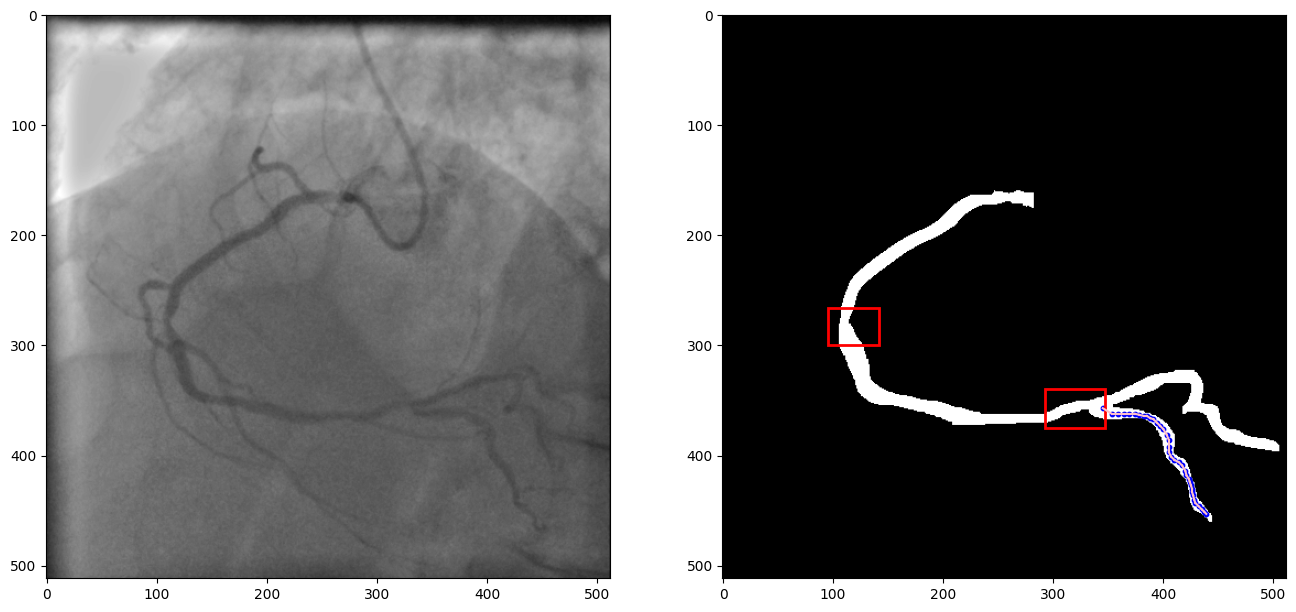

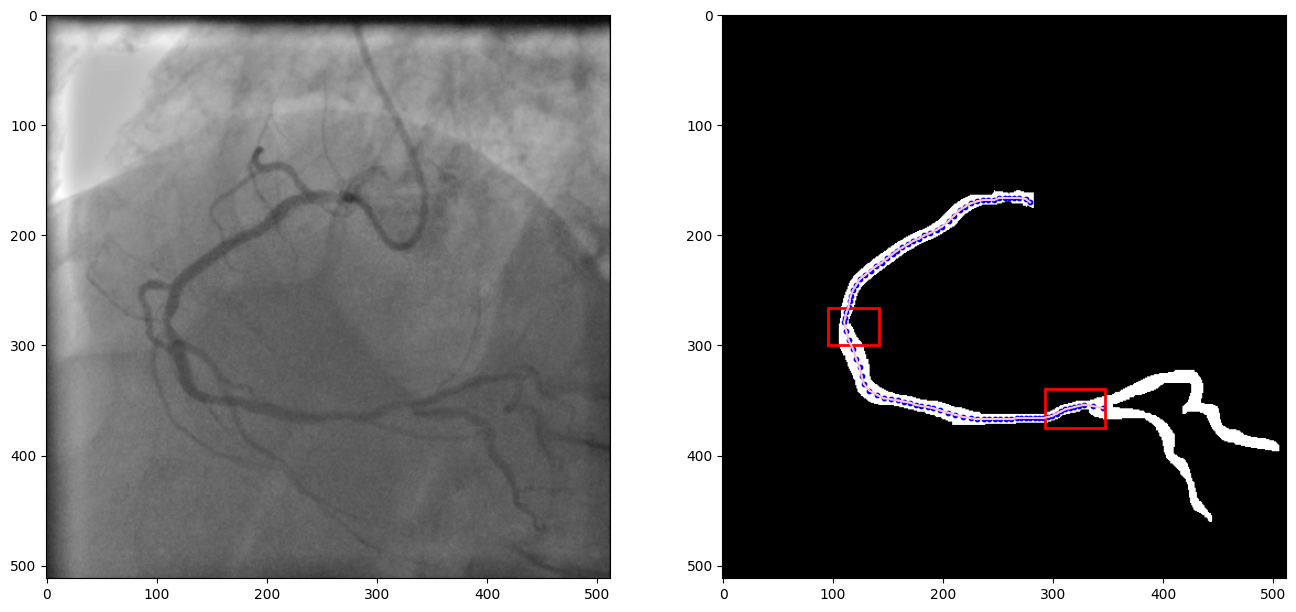

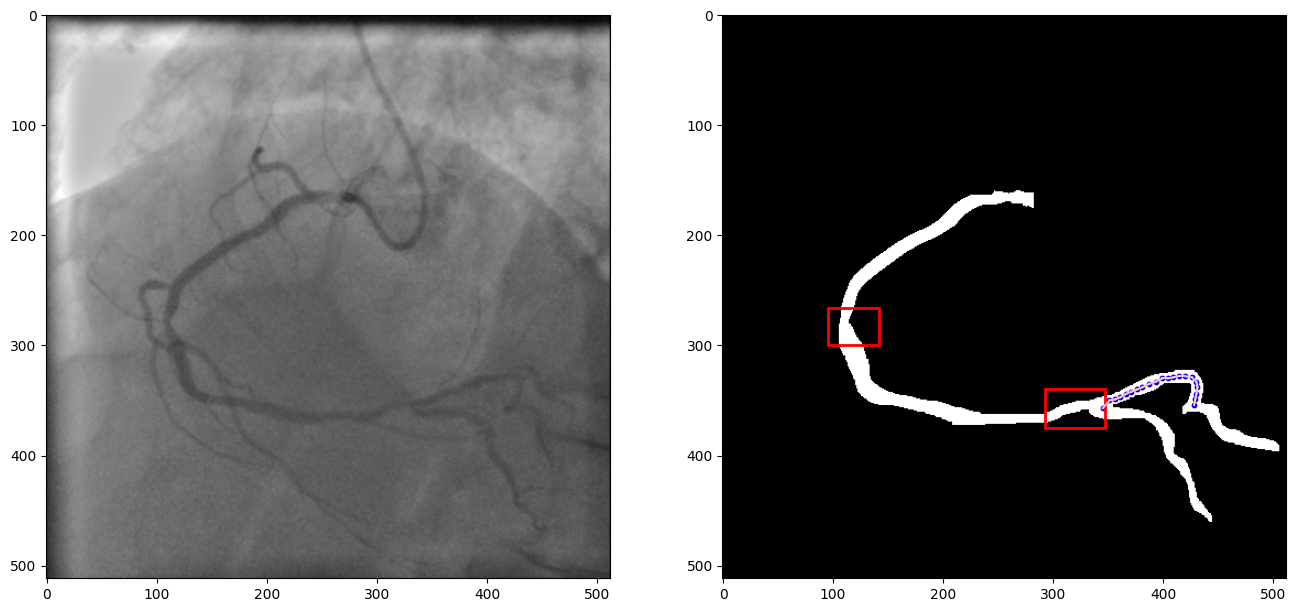

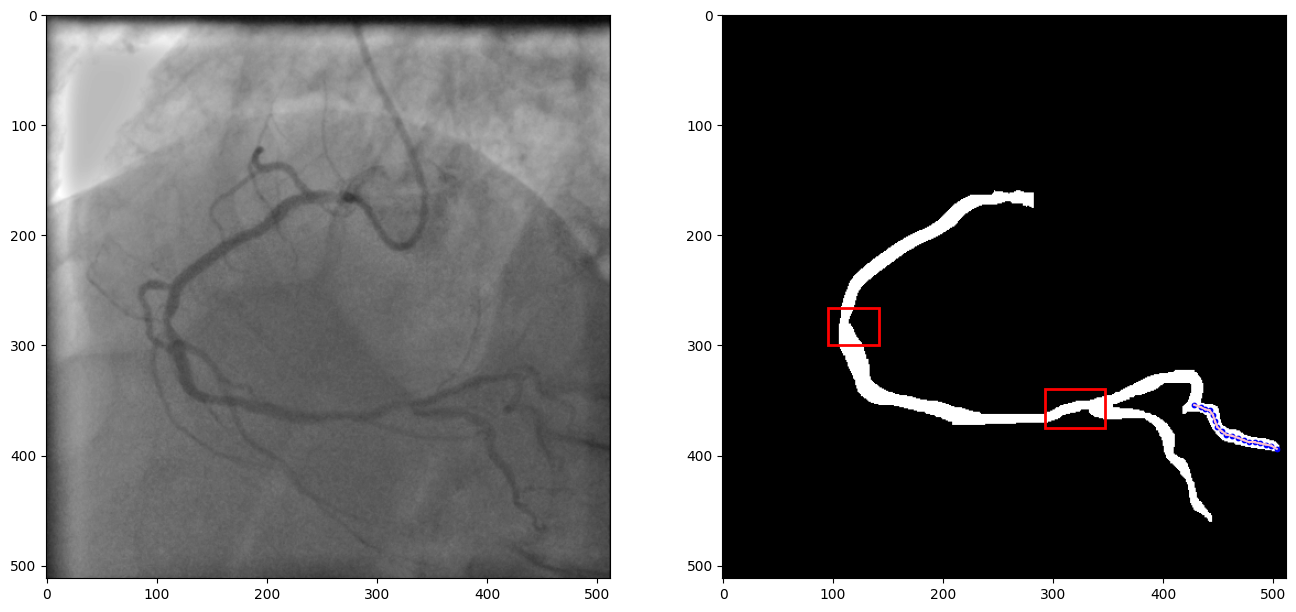

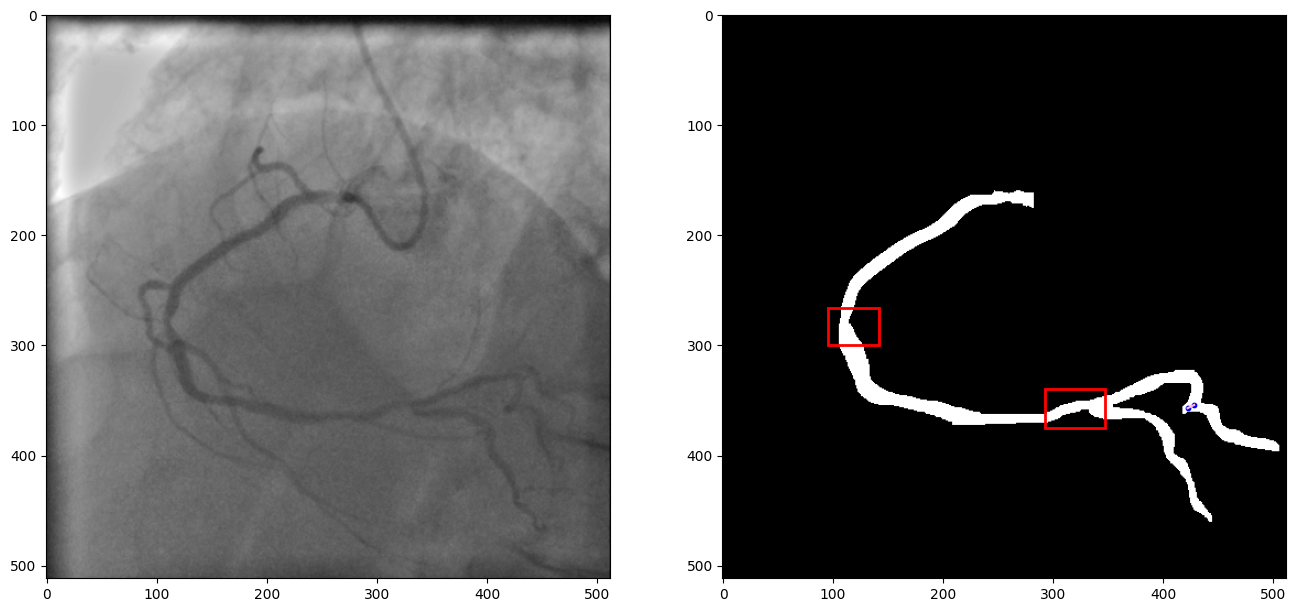

In [6]:
for branch in branches28:
    cx.plot_branch(branch)

### Sweeping

In [7]:
sweep = cxa.sweep(branches28[1], branches28[1].scan.vessel_mask, width=50)

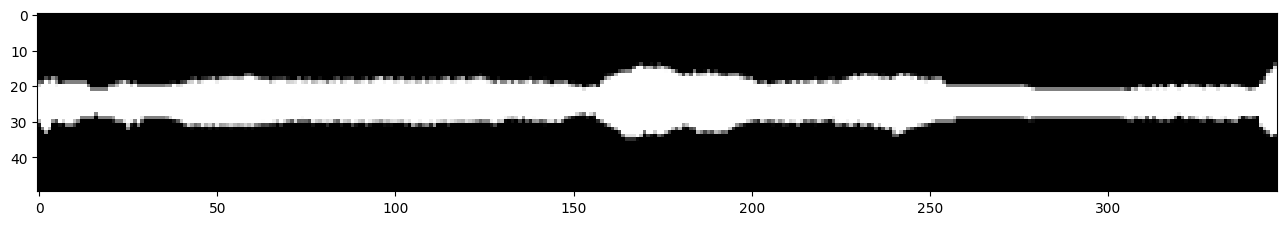

In [8]:
plt.figure(figsize=(16, 4))
plt.imshow(sweep.T, cmap='gray')
plt.show()

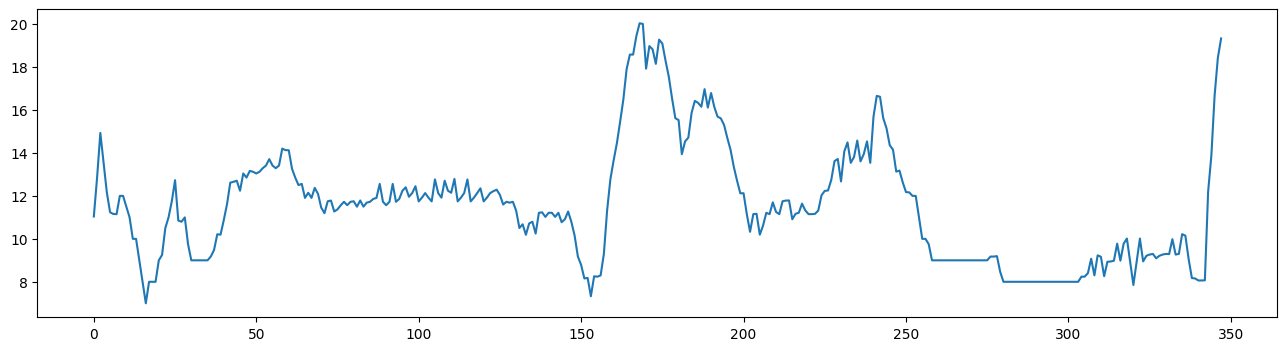

In [9]:
widths = np.sum(sweep, axis=1)

plt.figure(figsize=(16, 4))
plt.plot(np.arange(widths.shape[0]), widths)
plt.show()

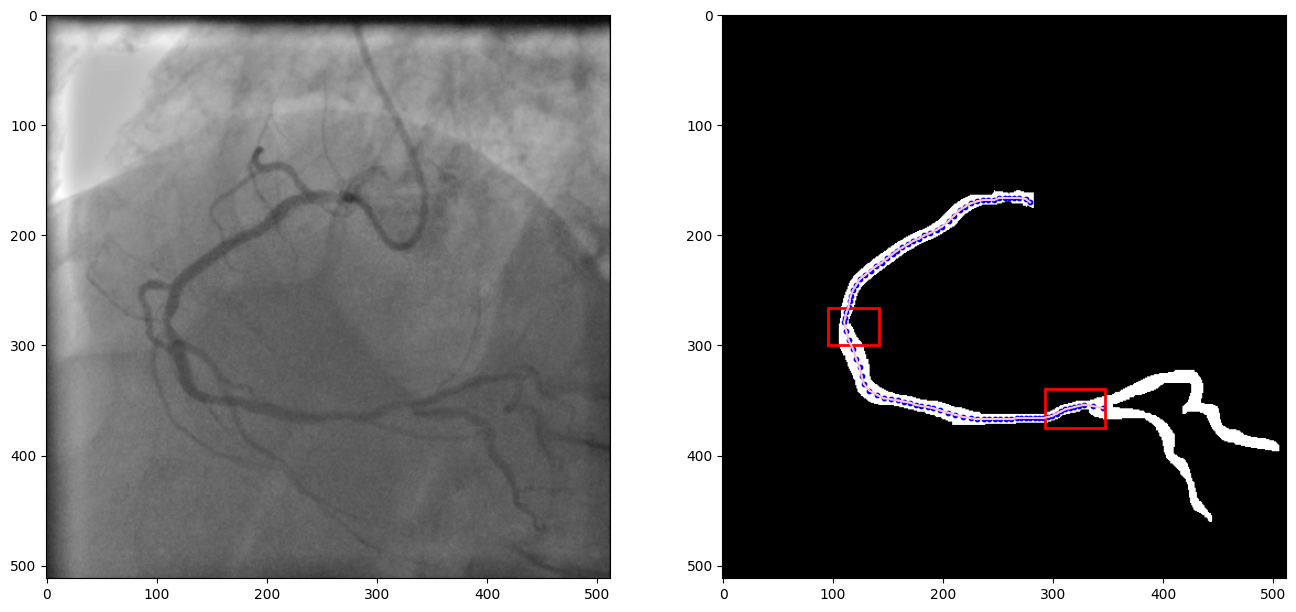

In [10]:
cx.plot_branch(branches28[1])

## Functions

In [3]:
a = np.arange(32).reshape((4, 8))
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])

In [7]:
xx, yy = np.meshgrid([1.0, 2.0, 3.0], [1.0, 2.0, 3.0], indexing='ij')
cxf.interp_matrix(a, xx, yy)

array([[ 9., 10., 11.],
       [17., 18., 19.],
       [25., 26., 27.]])

In [9]:
cxf.interp_matrix(a, xx - 0.5, yy - 0.5)

array([[ 4.5,  5.5,  6.5],
       [12.5, 13.5, 14.5],
       [20.5, 21.5, 22.5]])

In [4]:
# should be [18.5, 14.5, 28.0]
cxf.interp_matrix(a, [1.5, 1.5, 3.0], [6.5, 2.5, 4.0])

array([18.5, 14.5, 28. ])

In [5]:
cxf.interp_matrix(a, 1.5, 6.5)

array([18.5])

### Analysis

>>> branch #0


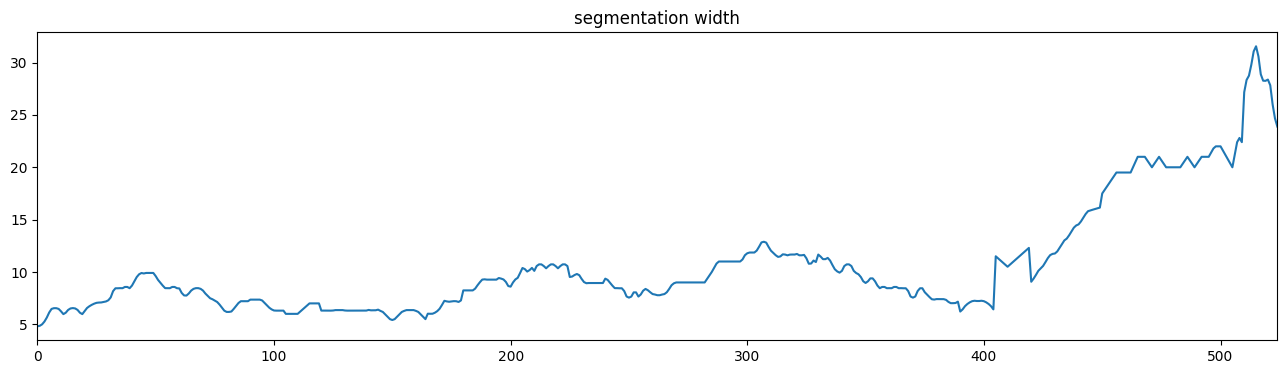

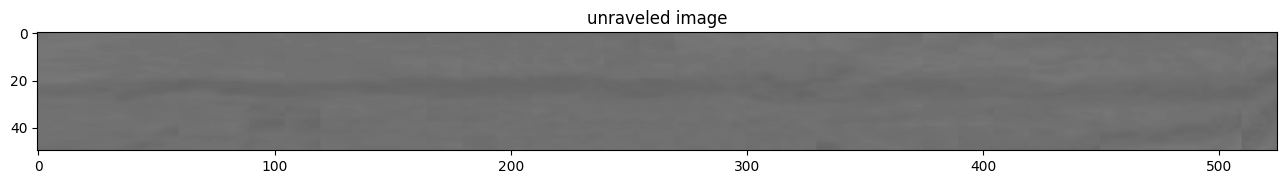

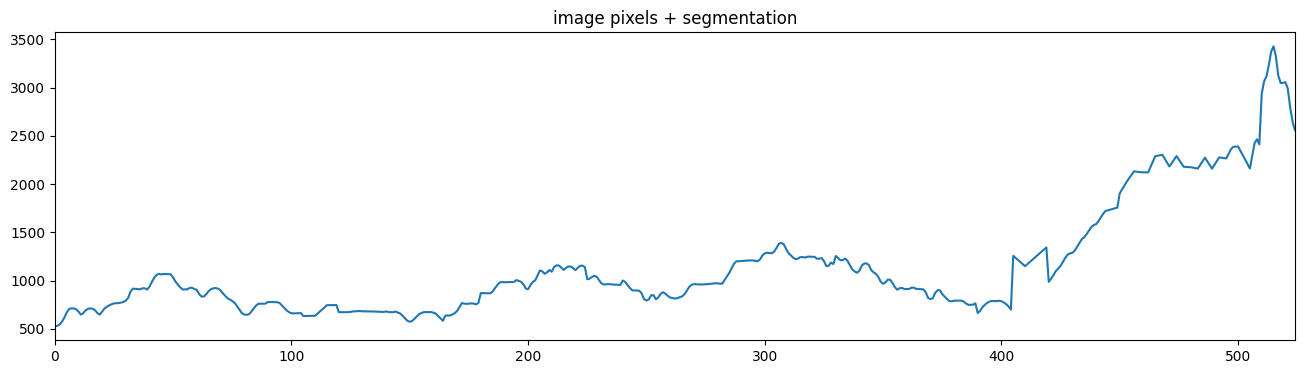

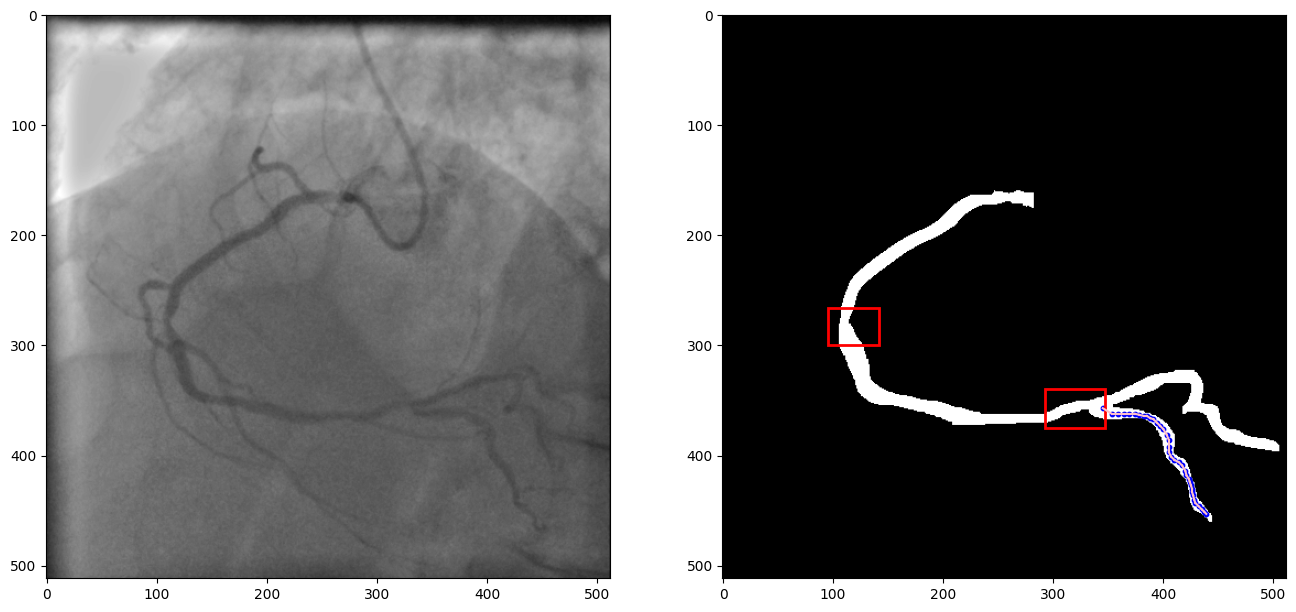

>>> branch #1


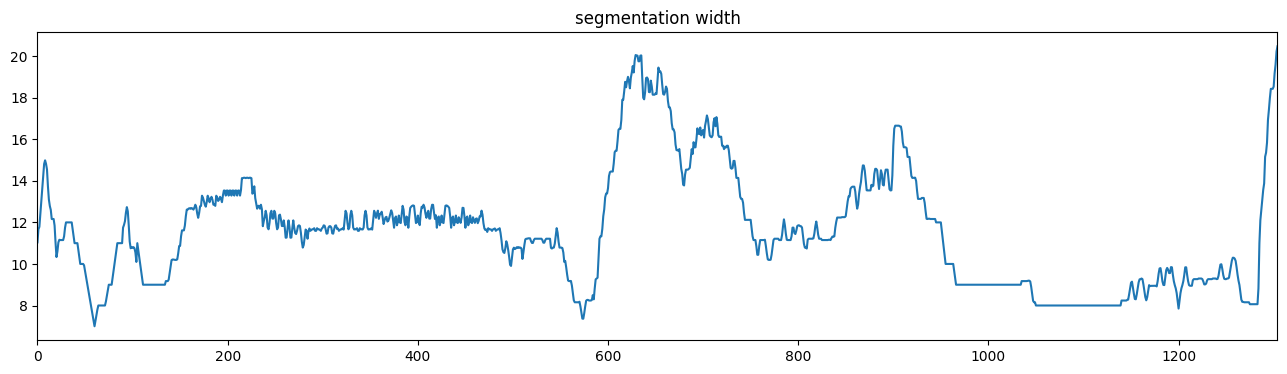

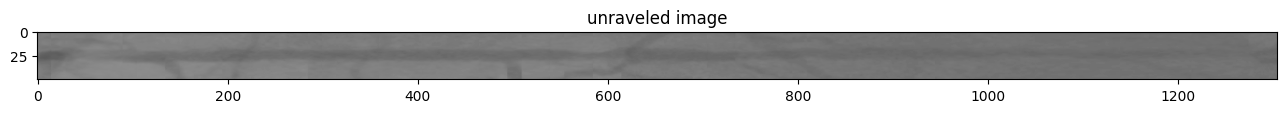

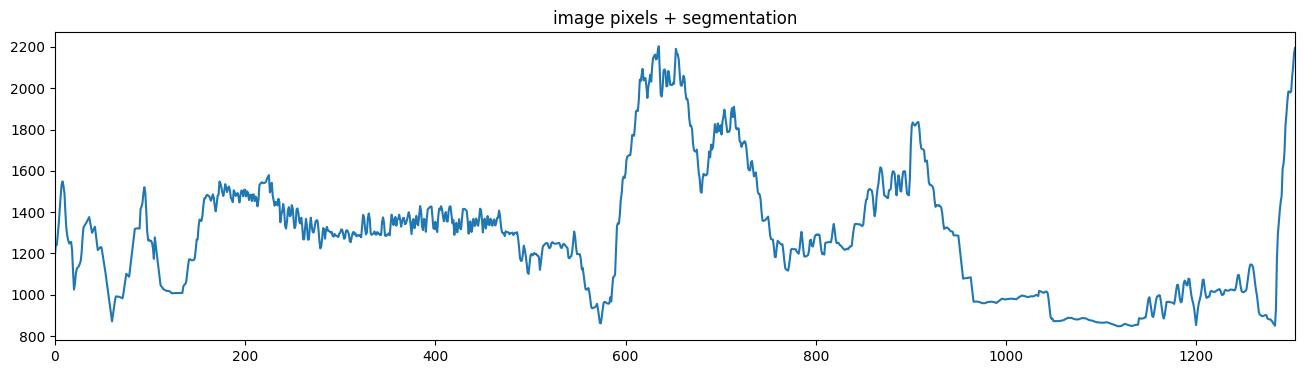

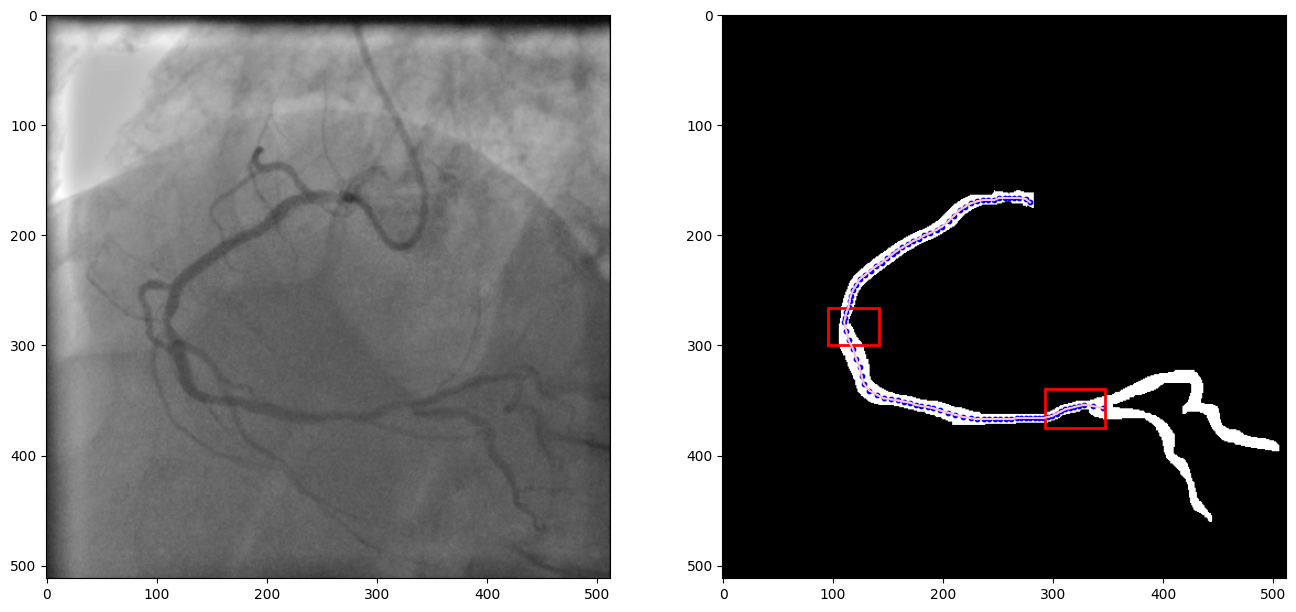

>>> branch #2


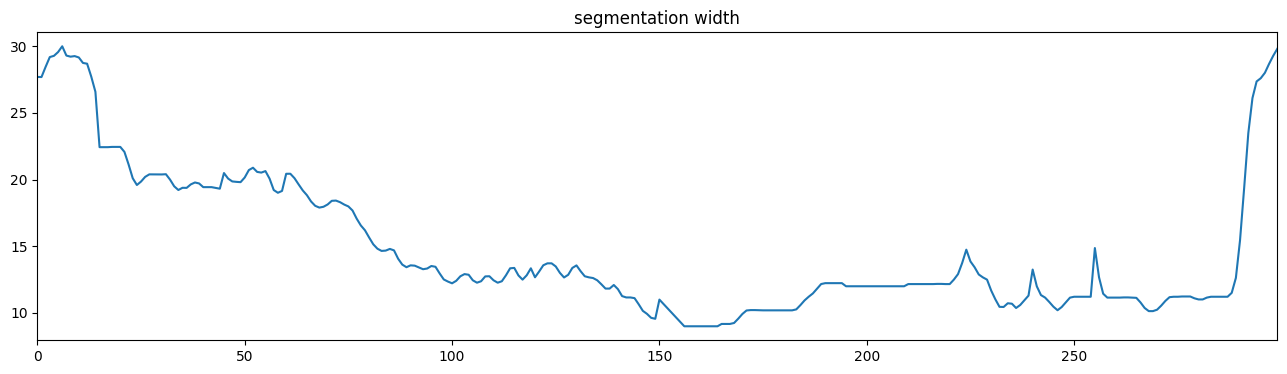

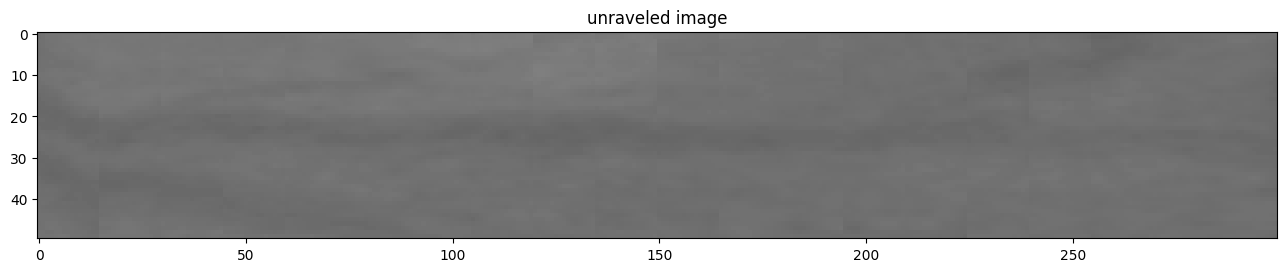

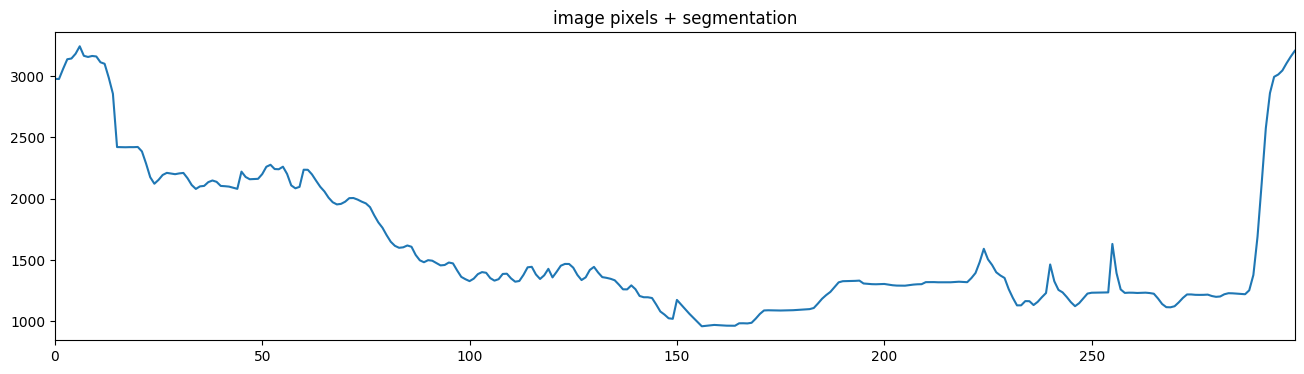

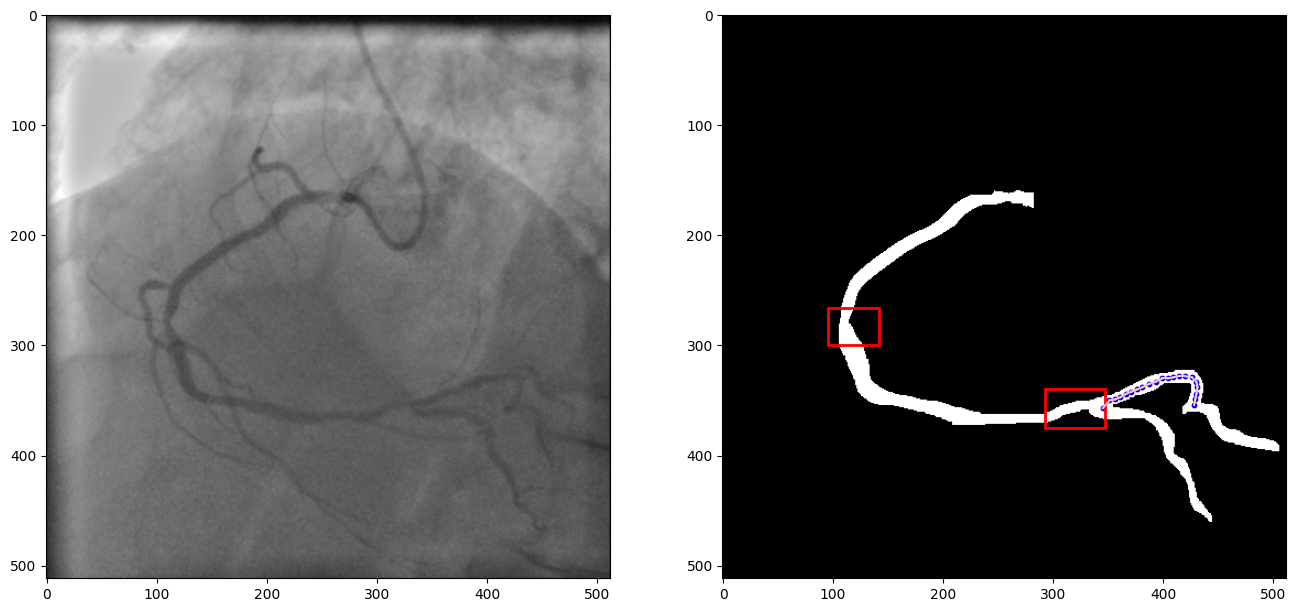

>>> branch #3


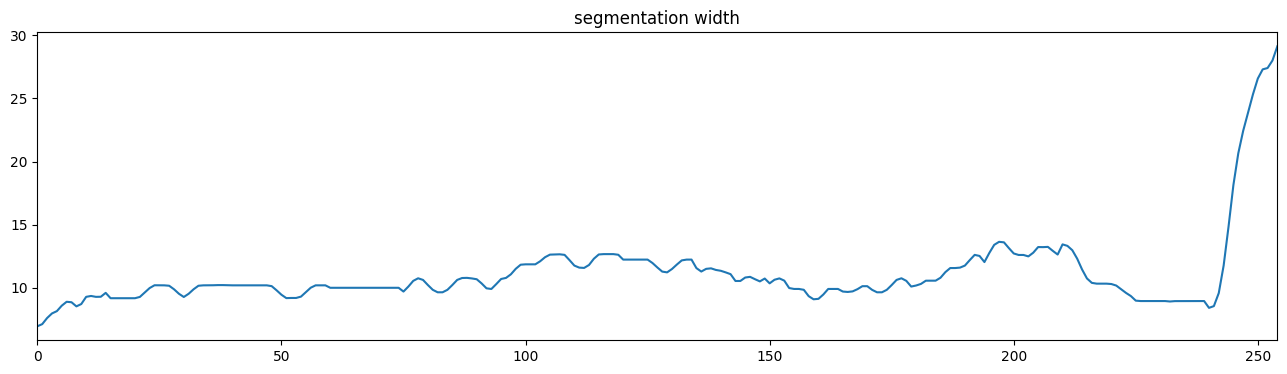

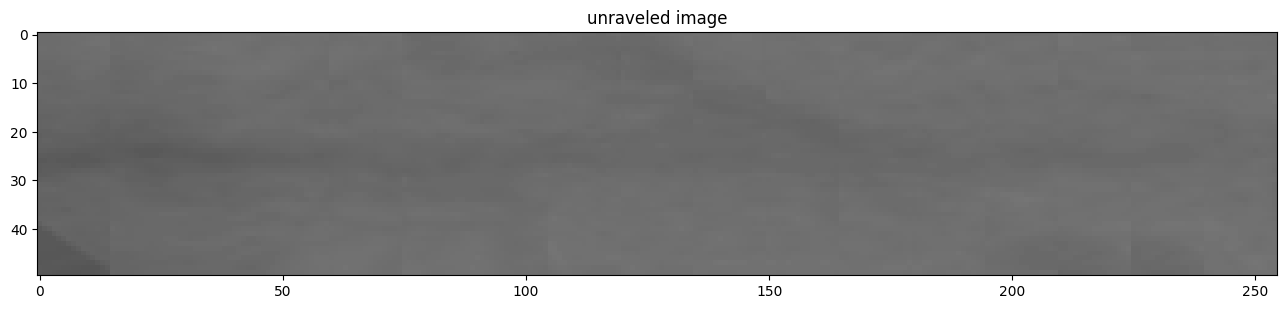

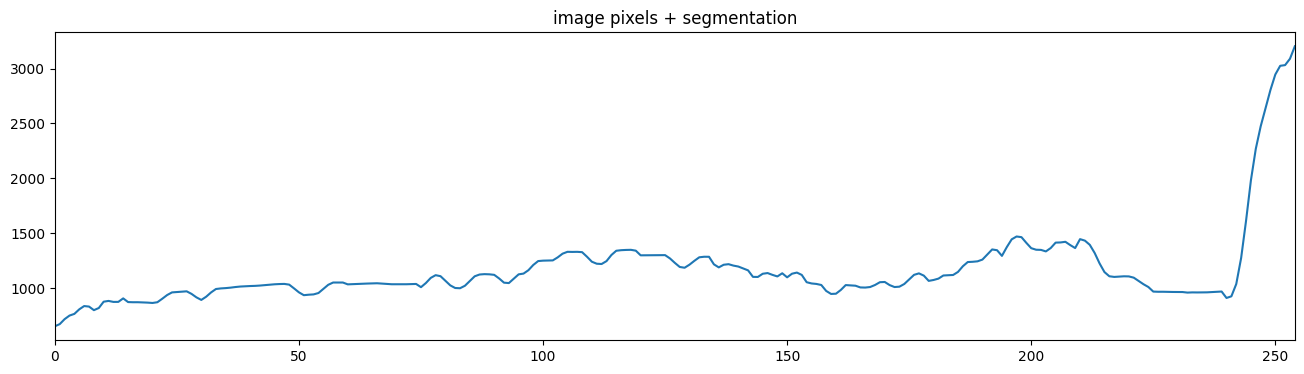

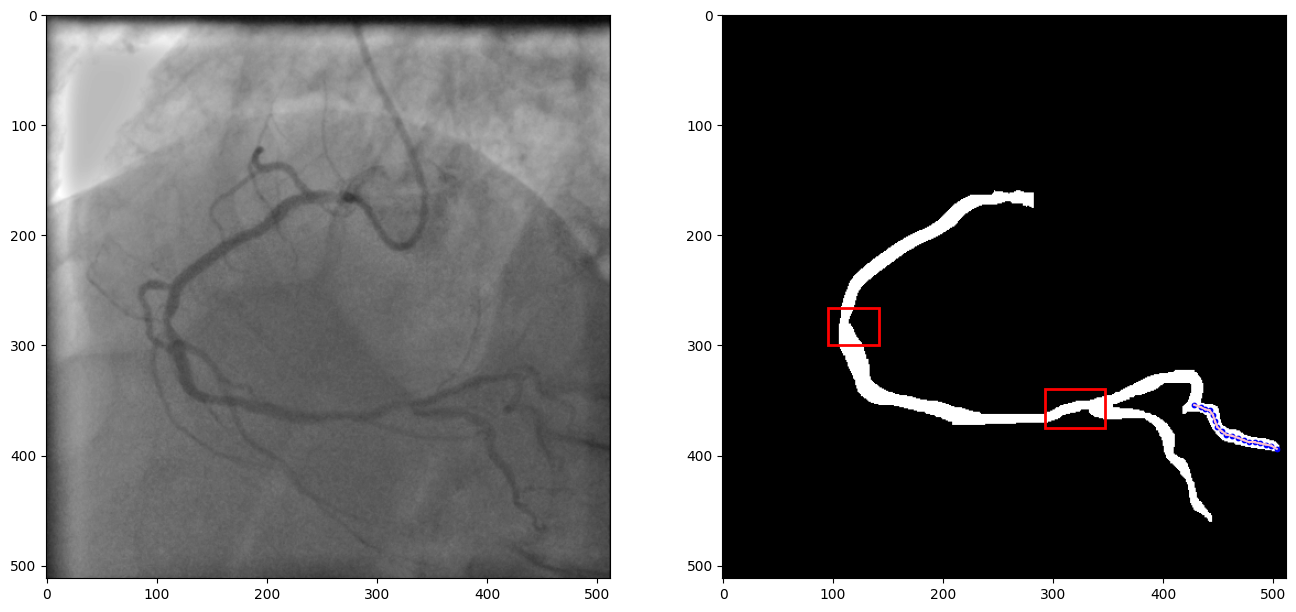

>>> branch #4


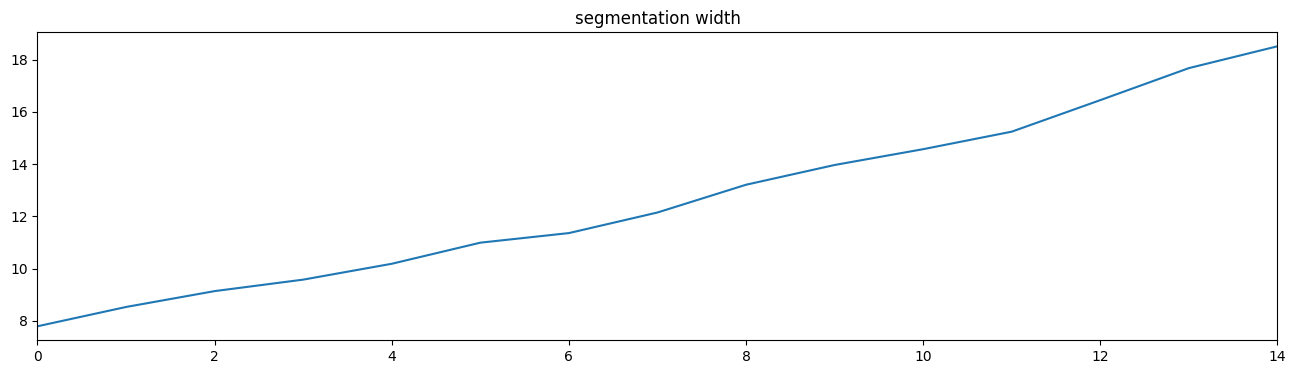

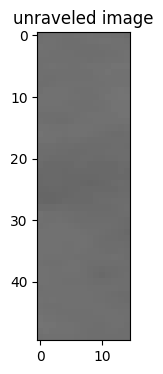

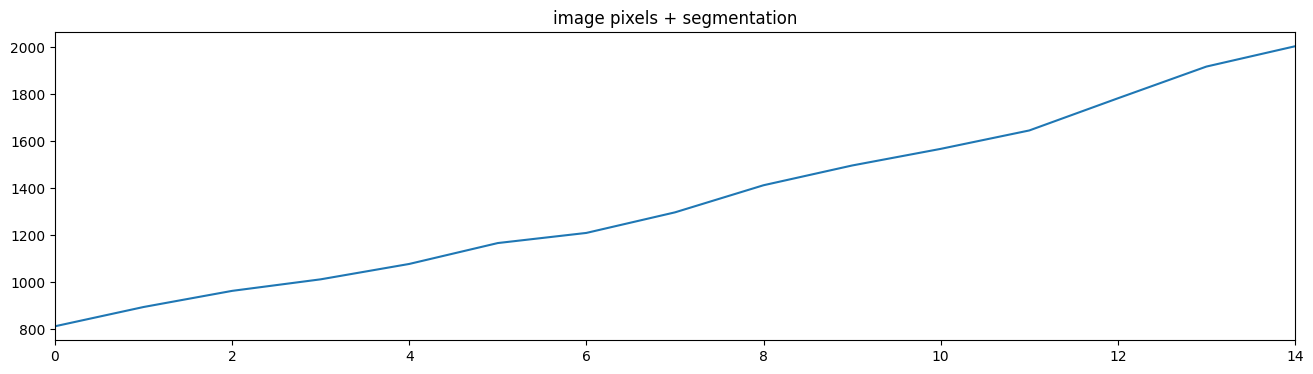

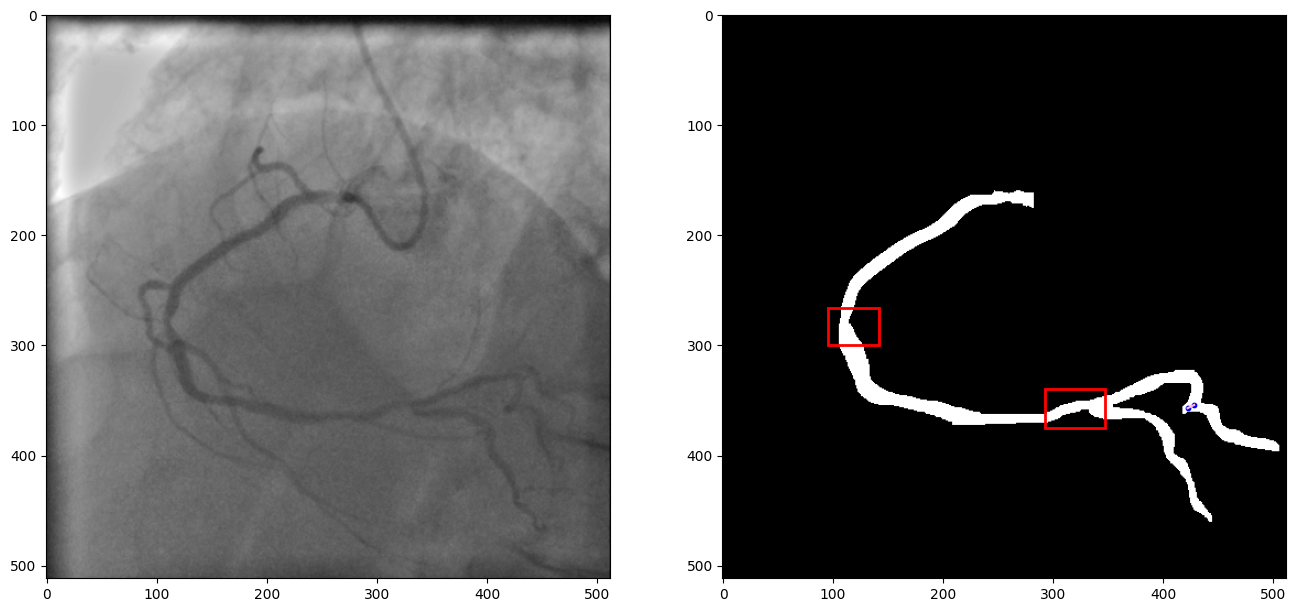

In [14]:
for i, branch in enumerate(branches28):
    print(f'>>> branch #{i}')

    # widths
    sweep = cxa.sweep(branch, branch.scan.vessel_mask, sampling_rate=15)
    widths = np.sum(sweep, axis=1)

    plt.figure(figsize=(16, 4))
    plt.title('segmentation width')
    plt.plot(np.arange(widths.shape[0]), widths)
    plt.xlim(0, widths.shape[0]-1)
    plt.show()

    # unraveled image
    sweep_original = cxa.sweep(branch, branch.scan.scan, sampling_rate=15)

    plt.figure(figsize=(16, 4))
    plt.title('unraveled image')
    plt.imshow(sweep_original.T, cmap='gray', vmin=0, vmax=255)
    plt.show()

    # image + segmentation
    sweep_img_seg = cxa.sweep(branch, branch.scan.scan * branch.scan.vessel_mask, sampling_rate=15)
    values = np.sum(sweep_img_seg, axis=1)

    plt.figure(figsize=(16, 4))
    plt.title('image pixels + segmentation')
    plt.plot(np.arange(values.shape[0]), values)
    plt.xlim(0, values.shape[0]-1)
    plt.show()

    # the branch itself
    cx.plot_branch(branch)

>>> branch #1


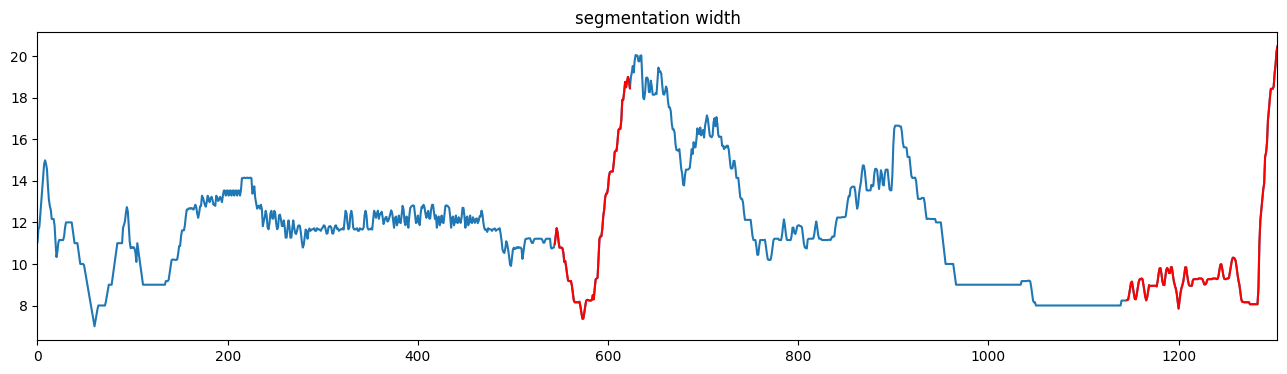

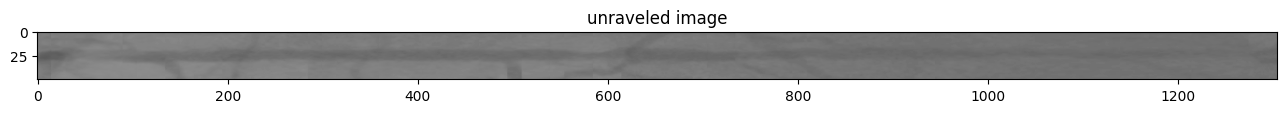

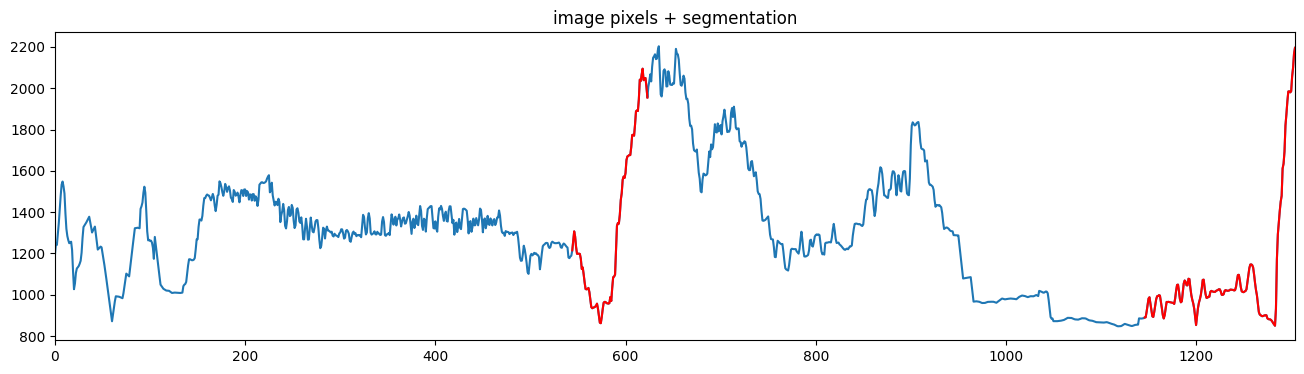

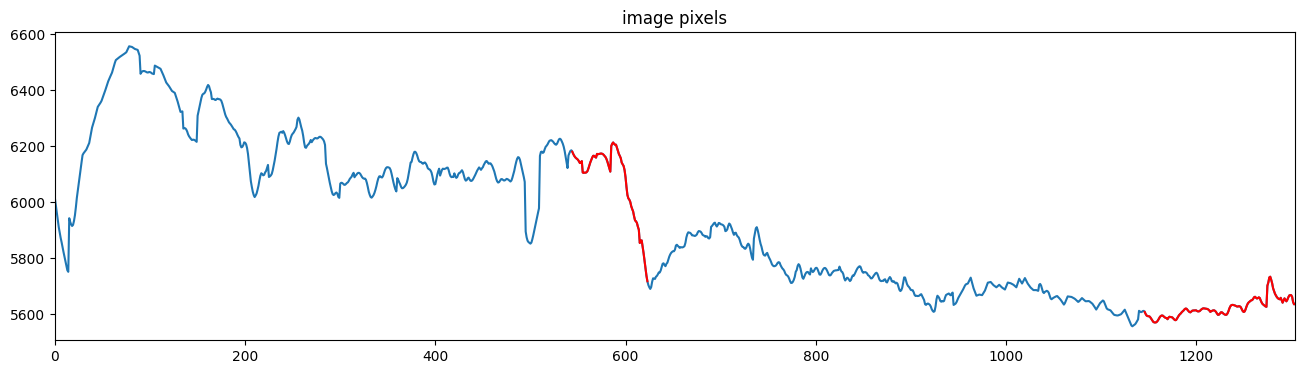

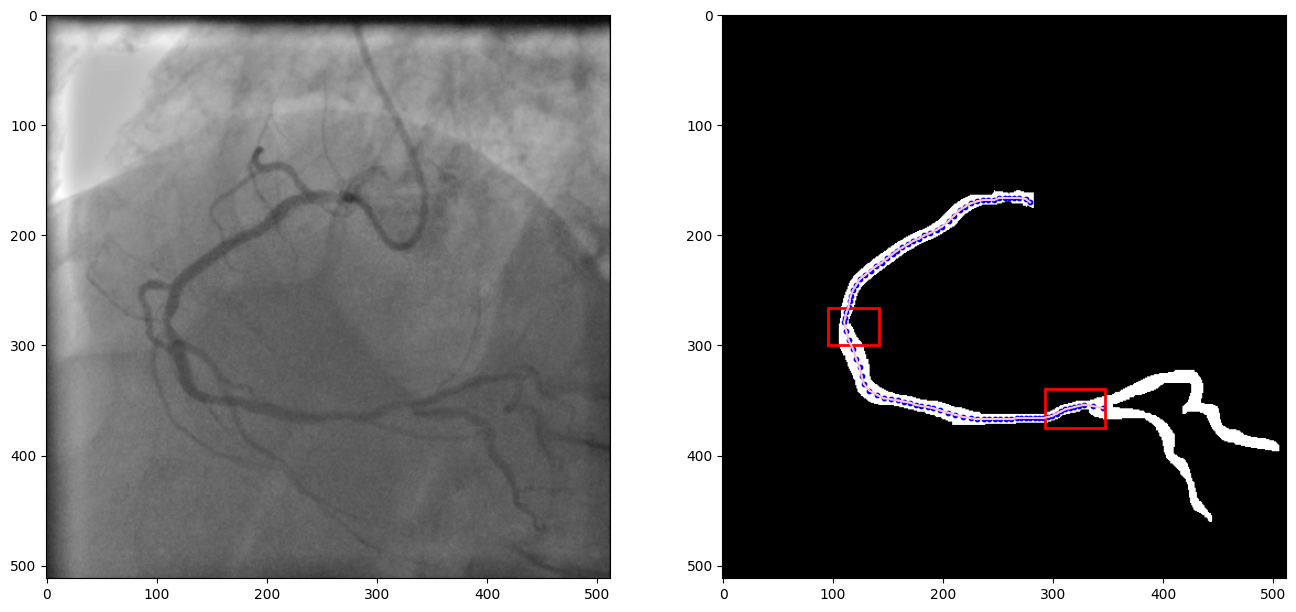

In [8]:
for i, branch in enumerate(branches28[1:2]):
    print(f'>>> branch #1')

    # widths
    sweep, roi_mask = cxa.sweep(branch, branch.scan.vessel_mask, sampling_rate=15, return_roi_positives=True)
    widths = np.sum(sweep, axis=1)

    plt.figure(figsize=(16, 4))
    plt.title('segmentation width')
    plt.plot(np.arange(widths.shape[0]), widths)
    plt.plot(np.arange(widths.shape[0]), np.ma.masked_array(widths, mask=~roi_mask), color='r')
    plt.xlim(0, widths.shape[0]-1)
    plt.show()

    # unraveled image
    sweep_original = cxa.sweep(branch, branch.scan.scan, sampling_rate=15)

    plt.figure(figsize=(16, 4))
    plt.title('unraveled image')
    plt.imshow(sweep_original.T, cmap='gray', vmin=0, vmax=255)
    plt.show()

    # image + segmentation
    sweep_img_seg = sweep_original * sweep
    values = np.sum(sweep_img_seg, axis=1)

    plt.figure(figsize=(16, 4))
    plt.title('image pixels + segmentation')
    plt.plot(np.arange(values.shape[0]), values)
    plt.plot(np.arange(widths.shape[0]), np.ma.masked_array(values, mask=~roi_mask), color='r')
    plt.xlim(0, values.shape[0]-1)
    plt.show()

    # image
    image_values = np.sum(sweep_original, axis=1)

    plt.figure(figsize=(16, 4))
    plt.title('image pixels')
    plt.plot(np.arange(image_values.shape[0]), image_values)
    plt.plot(np.arange(widths.shape[0]), np.ma.masked_array(image_values, mask=~roi_mask), color='r')
    plt.xlim(0, image_values.shape[0]-1)
    plt.show()


    # the branch itself
    cx.plot_branch(branch)

### Testing PyTorch Dataset

In [15]:
from cadml.datamodules.roi_classification import ROIClassificationDataset

In [16]:
pt_dataset = ROIClassificationDataset(branches28)

In [21]:
items = list(pt_dataset)
len(items), len([_ for _, label in items if label == 1])

(165, 18)

0


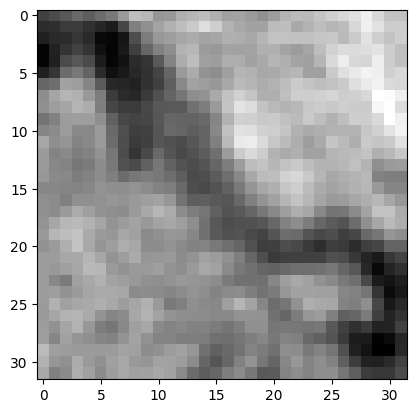

0


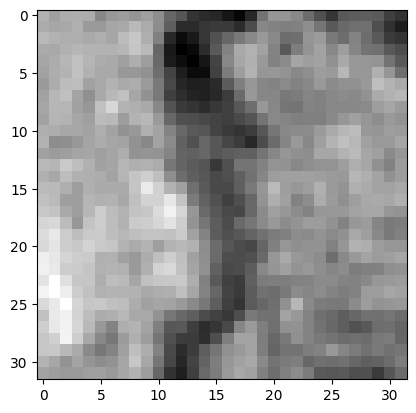

0


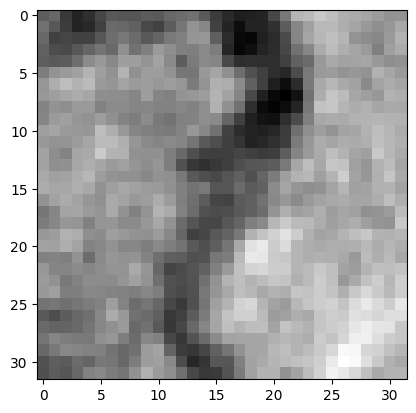

0


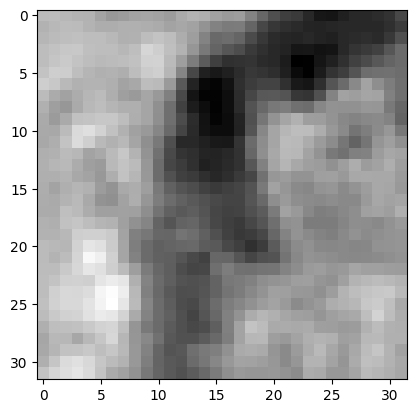

0


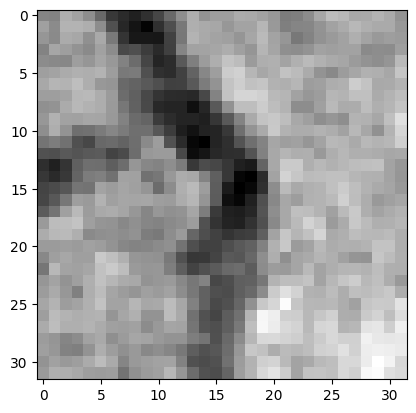

0


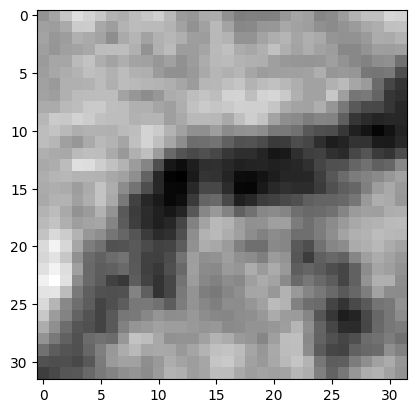

0


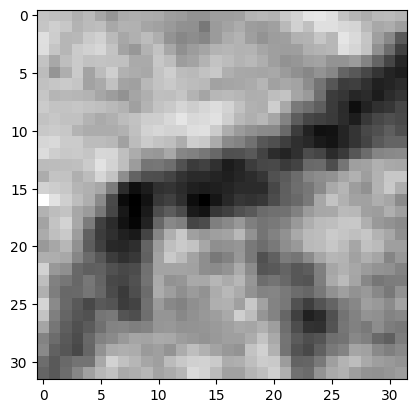

0


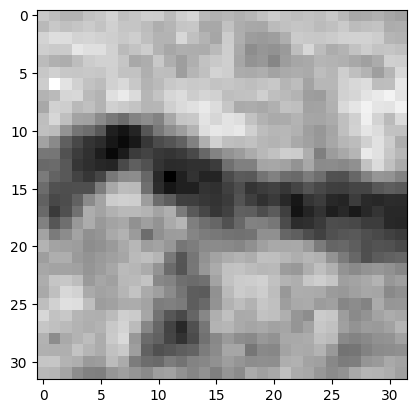

0


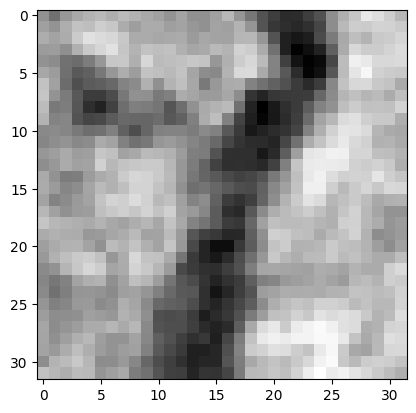

0


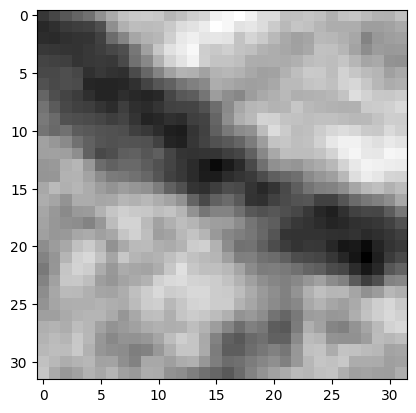

1


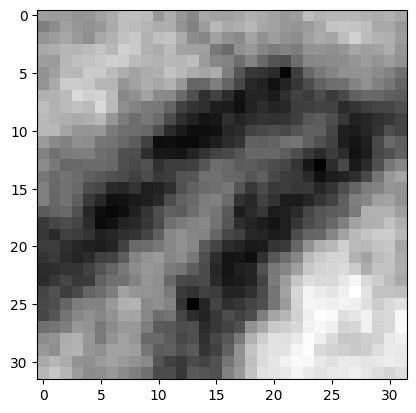

1


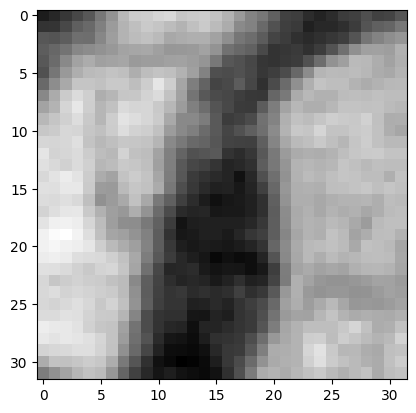

1


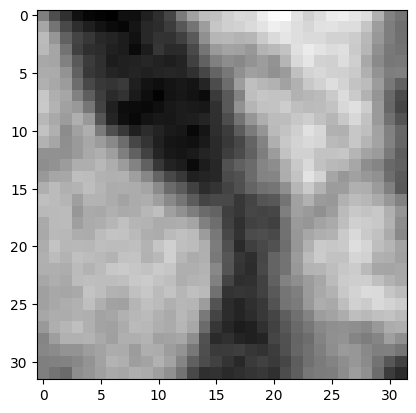

1


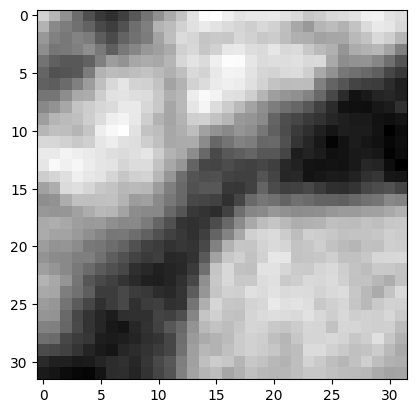

1


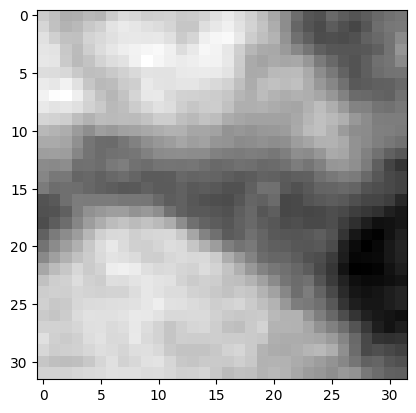

1


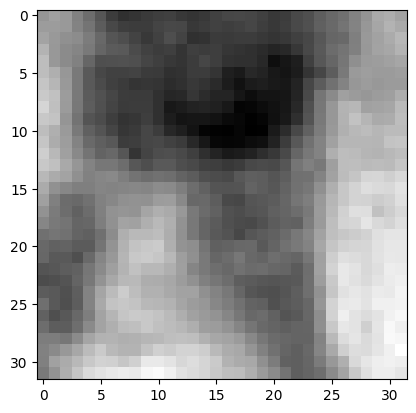

1


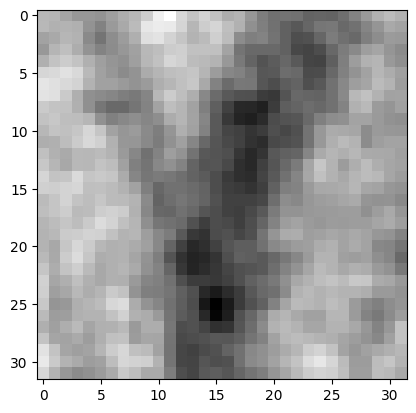

1


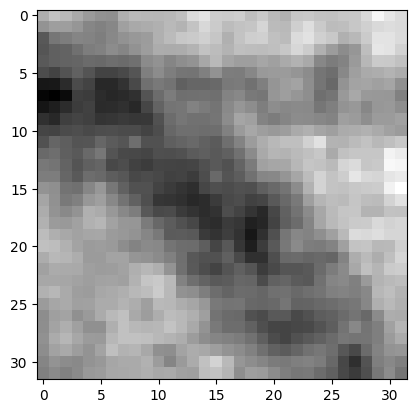

1


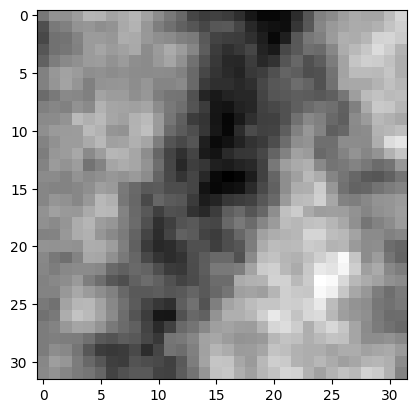

1


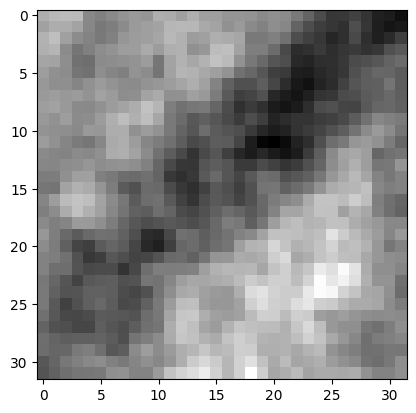

In [19]:
pos = 0
neg = 0
for img, label in items:
    if label == 0:
        neg += 1
        if neg > 10:
            continue

    if label == 1:
        pos += 1
        if pos > 10:
            continue

    print(label)
    plt.imshow(img, cmap='gray')
    plt.show()